<a href="https://colab.research.google.com/github/natasyafila/Tugas-Pertemuan-1/blob/main/PRAK_ML_Tugas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

# REGRESI NON LINEAR

## Contoh 1

Dalam contoh ini, kita menggunakan data variabel x dan y untuk membandingkan regresi linier dan non-linier.
Model eksponensial (a * exp(b * x)) dihadapkan dengan model linier (y ~ x). Hasil regresi dan visualisasi akan
membantu membandingkan bagaimana kedua model menyesuaikan data. Perhatikan bahwa hasil yang “lebih
baik” dapat dilihat dari seberapa baik model memfitting data dan kriteria evaluasi lainnya yang terdapat dalam
hasil ringkasan.

In [ ]:
# Membuat data contoh

set.seed(123)
# Mengatur seed untuk menghasilkan deret angka acak

x <- seq(1, 10, length.out = 100)
# X adalah sekumpulan nilai mulai dari 1 hingga 10, dengan total 100 nilai

y <- 2 * exp(0.5 * x) + rnorm(100, mean = 0, sd =1)
# Y dihasilkan dengan formula 2 * exp(0.5 * x)
# yang merupakan fungsi eksponensial dari x
# ditambahkan dengan rnorm (distribusi normal acak) untuk menambahkan "noise" ke data y.

# Membuat data frame
data <- data.frame(x,y)
# Menggabungkan x dan y ke dalam sebuah data frame yang bernama data.

# Regresi Linear
linear_model <- lm( y~ x, data=data)
# Membuat model regresi linear menggunakan fungsi lm di mana y diprediksi oleh x.

# Regresi Non-Linier
nonlinear_model <- nls(y ~ a * exp(b * x), data = data, start = list(a = 1, b = 0.5))
# Membuat model regresi non-linear menggunakan fungsi nls dengan model y = a * exp(b * x).
# start = list(a = 1, b = 0.5) memberikan perkiraan awal untuk parameter a dan b.

In [ ]:
head(data)

,x,y
,<dbl>,<dbl>
1,1.000000,2.736967
2,1.090909,3.220607
3,1.181818,5.169967
4,1.272727,3.849703
5,1.363636,4.084227
6,1.454545,5.853923


In [ ]:
# Menampilkan hasil regresi
summary(linear_model)
# Menampilkan ringkasan hasil dari model regresi linear yang disimpan dalam variabel linear_model.


Call:
lm(formula = y ~ x, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.691 -32.043  -9.065  24.266 115.371 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -73.461      8.614  -8.528 1.87e-13 ***
x             25.389      1.414  17.960  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.1 on 98 degrees of freedom
Multiple R-squared:  0.767,	Adjusted R-squared:  0.7646 
F-statistic: 322.6 on 1 and 98 DF,  p-value: < 2.2e-16


In [ ]:
# Menampilkan hasil regresi
summary(nonlinear_model)
# Menampilkan ringkasan hasil dari model regresi nonlinear yang disimpan dalam variabel nonlinear_model.


Formula: y ~ a * exp(b * x)

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 1.9978263  0.0165074     121   <2e-16 ***
b 0.5002760  0.0009079     551   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9103 on 98 degrees of freedom

Number of iterations to convergence: 3 
Achieved convergence tolerance: 9.067e-09


## Contoh 2 (Regresi Non Linear Eksponensial)

Dalam contoh ini, kita menggunakan dataset mtcars untuk membandingkan regresi linier dan regresi non-linier
dengan model eksponensial untuk memprediksi mpg berdasarkan hp. Anda dapat mengganti variabel atau dataset
sesuai kebutuhan Anda. Perhatikan bahwa pemilihan model non-linier juga bisa tergantung pada pemahaman
domain atau teori tertentu yang mendasari hubungan antara variabel.


`geom_smooth()` using formula = 'y ~ x'


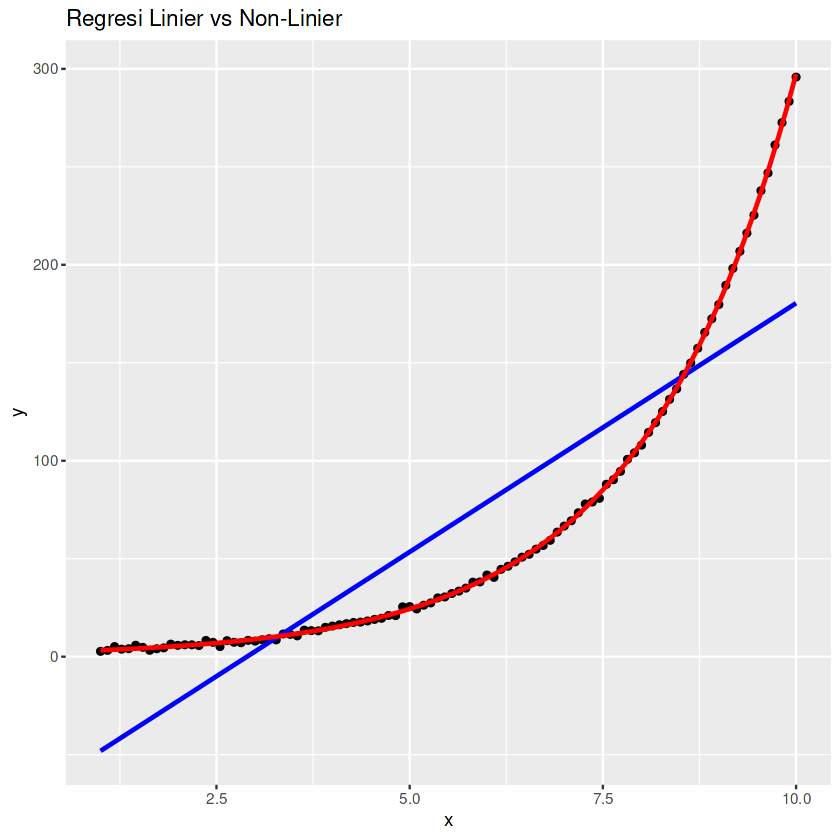

In [ ]:
# Membuat plot

library(ggplot2)

# Memuat library ggplot2

ggplot(data, aes(x, y)) +
# Memulai pembuatan plot menggunakan ggplot menggunakan data dari objek data
# Menentukan bahwa sumbu x direpresentasikan oleh variabel x dan sumbu y oleh variabel y.

  geom_point() +
# Menambahkan titik-titik ke plot sebagai representasi dari data menggunakan geom_point()
# Setiap titik akan menunjukkan pasangan nilai dari variabel x dan y.


  geom_smooth(method = "lm", se = FALSE, color = "blue") +
# Menambahkan garis regresi linier ke plot menggunakan geom_smooth()
# dengan menggunakan metode "lm" (linear model)
# se = FALSE menghilangkan interval kepercayaan dari garis regresi.
# Garis ini akan berwarna biru.

  geom_smooth(method = "nls", formula = y ~ a * exp(b * x), se = FALSE, color = "red",
# Menambahkan kurva regresi non-linier ke plot menggunakan geom_smooth() dengan menggunakan metode "nls"
# Formula yang digunakan adalah y ~ a * exp(b * x) yang merupakan fungsi eksponensial.
# se = FALSE menghilangkan interval kepercayaan dari kurva regresi. Kurva ini akan berwarna merah.

  method.args = list(start = c(a = 1, b = 0.5))) +
# method.args = list(start = c(a = 1, b = 0.5)) memberikan nilai awal untuk parameter a dan b dalam model regresi non-linier.

  labs(title = "Regresi Linier vs Non-Linier")
# Memberikan judul pada plot dengan menggunakan fungsi labs() dan menetapkan judulnya sebagai "Regresi Linier vs Non-Linier".

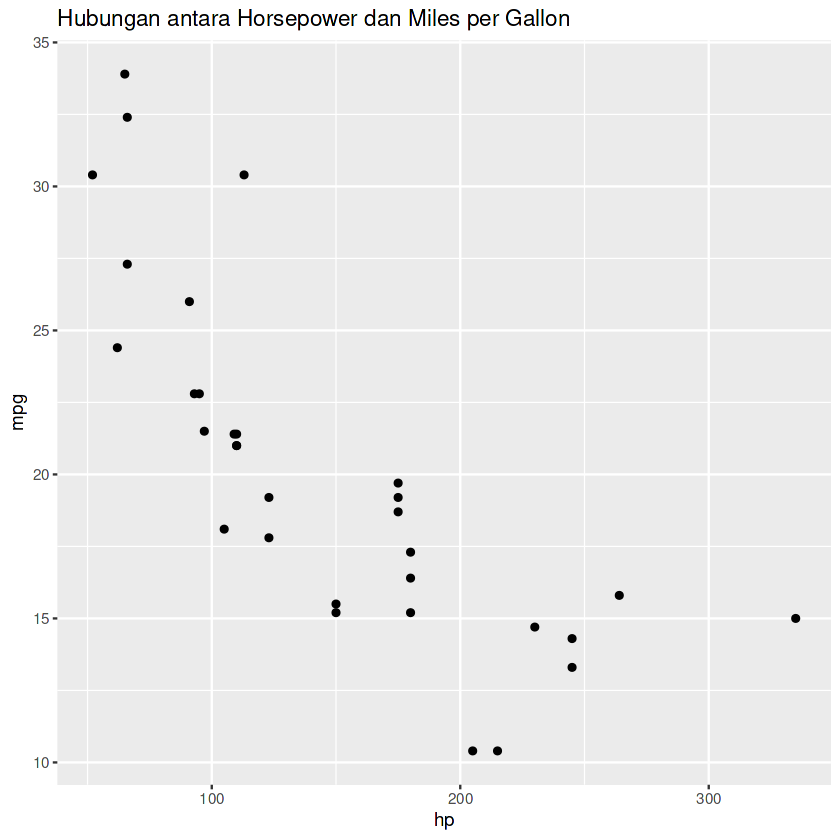

In [ ]:
# Membuat plot data real

library(ggplot2)
# Memuat library ggplot2

ggplot(mtcars, aes(x = hp, y = mpg)) +
# ggplot() memulai pembuatan plot dengan menggunakan dataset mtcars.
# aes(x = hp, y = mpg) menetapkan bahwa sumbu x akan diisi dengan data dari kolom hp (horsepower)
# sumbu y akan diisi dengan data dari kolom mpg (miles per gallon).

 geom_point() +
# geom_point() menambahkan titik-titik ke plot sebagai representasi dari
# hubungan antara horsepower dan miles per gallon.
# Setiap titik akan mewakili satu mobil dalam dataset mtcars.

 labs(title = "Hubungan antara Horsepower dan Miles per Gallon")
# menambahkan judul pada plot

In [ ]:
# Regresi Linier
linear_model <- lm(mpg ~ hp, data = mtcars)
# lm() digunakan untuk membuat model regresi linier.
# mpg ~ hp menunjukkan bahwa kita ingin memprediksi mpg (miles per gallon) berdasarkan variabel hp (horsepower).
# data = mtcars menentukan bahwa data yang digunakan untuk analisis adalah dataset mtcars.
# Hasil fungsi lm() disimpan dalam variabel linear_model.

summary(linear_model)
# summary() digunakan untuk mendapatkan ringkasan statistik dari model regresi linier


Call:
lm(formula = mpg ~ hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


In [ ]:
# Regresi Non-Linier (Eksponensial)
nonlinear_model <- nls(mpg ~ a * exp(b * hp), data = mtcars, start = list(a = 20, b = -0.02))
# nls() digunakan untuk membuat model regresi non-linier.
# mpg ~ a * exp(b * hp) adalah formula yang menentukan hubungan antara
# variabel mpg (miles per gallon) dengan variabel hp (horsepower) dalam bentuk fungsi eksponensial
# data = mtcars menunjukkan bahwa data yang digunakan adalah dataset mtcars.
# start = list(a = 20, b = -0.02) memberikan nilai awal untuk parameter a dan b
# Hasil fungsi nls() disimpan dalam variabel nonlinear_model.

summary(nonlinear_model)
# summary() digunakan untuk mendapatkan ringkasan statistik dari model regresi non-linier


Formula: mpg ~ a * exp(b * hp)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a 35.9014543  2.5413806  14.127 8.54e-15 ***
b -0.0042396  0.0005556  -7.631 1.64e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.43 on 30 degrees of freedom

Number of iterations to convergence: 5 
Achieved convergence tolerance: 7.721e-06


`geom_smooth()` using formula = 'y ~ x'


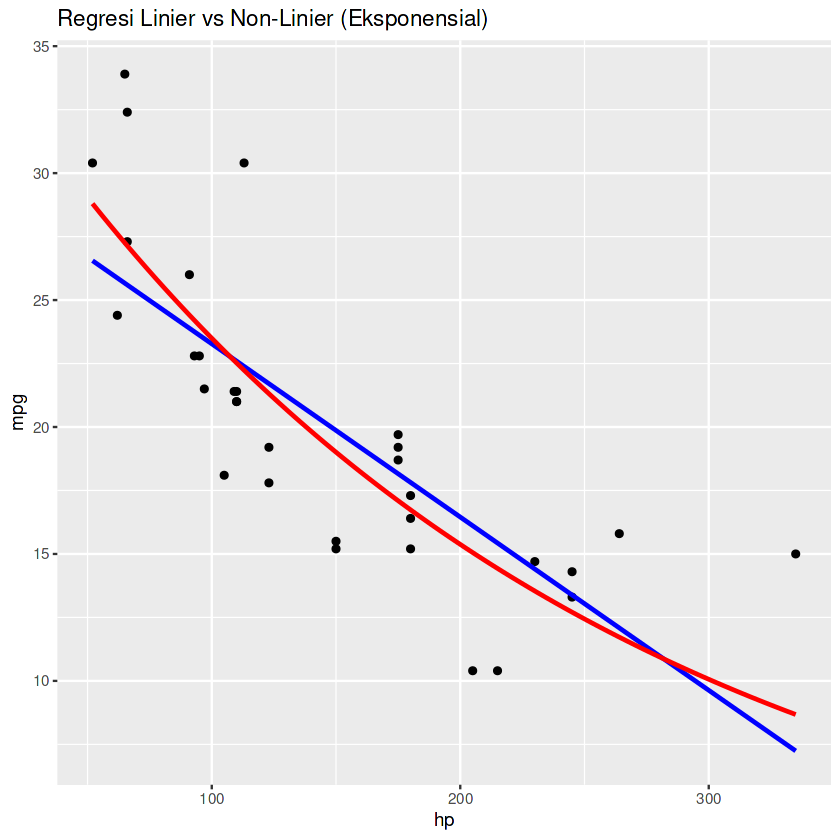

In [ ]:
# Menampilkan plot dengan hasil regresi
ggplot(mtcars, aes(x = hp, y = mpg)) +
# ggplot() memulai pembuatan plot dengan menggunakan dataset mtcars.
# aes(x = hp, y = mpg) menetapkan bahwa sumbu x akan diisi dengan data dari kolom hp (horsepower)
# sumbu y akan diisi dengan data dari kolom mpg (miles per gallon).

 geom_point() +
# geom_point() menambahkan titik-titik ke plot sebagai representasi dari hubungan antara variabel hp dan mpg

 geom_smooth(method = "lm", se = FALSE, color = "blue") +
# geom_smooth(method = "lm", se = FALSE, color = "blue") menambahkan garis regresi linier ke plot dengan warna biru.
# method = "lm" menginstruksikan ggplot2 untuk menggunakan metode regresi linier.
# se = FALSE menghilangkan area interval kepercayaan dari garis regresi.

 geom_smooth(method = "nls", formula = y ~ a * exp(b * x), se = FALSE, color = "red",
# geom_smooth(method = "nls", ...) menambahkan kurva regresi non-linier ke plot dengan warna merah.
# method = "nls" menginstruksikan ggplot2 untuk menggunakan metode regresi non-linier.
# formula = y ~ a * exp(b * x) mendefinisikan formula untuk regresi non-linier dalam bentuk fungsi eksponensial.
# se = FALSE menghilangkan area interval kepercayaan dari kurva regresi.

 method.args = list(start = c(a = 20, b = -0.02))) +
# method.args = list(start = c(a = 20, b = -0.02)) memberikan nilai awal untuk parameter a dan b dalam model.

 labs(title = "Regresi Linier vs Non-Linier (Eksponensial)")
# menambahkan judul pada plot

## Contoh 3 (Regresi Non Linear Quadratik)

Dalam contoh ini, kita menggunakan dataset Orange untuk membandingkan regresi linier dengan regresi nonlinier (model kuadrat) untuk memprediksi lingkar buah jeruk berdasarkan umur

In [ ]:
# Memuat dataset Orange
data(Orange)

# Menampilkan struktur dataset
str(Orange)

Classes ‘nfnGroupedData’, ‘nfGroupedData’, ‘groupedData’ and 'data.frame':	35 obs. of  3 variables:
 $ Tree         : Ord.factor w/ 5 levels "3"<"1"<"5"<"2"<..: 2 2 2 2 2 2 2 4 4 4 ...
 $ age          : num  118 484 664 1004 1231 ...
 $ circumference: num  30 58 87 115 120 142 145 33 69 111 ...
 - attr(*, "formula")=Class 'formula'  language circumference ~ age | Tree
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "labels")=List of 2
  ..$ x: chr "Time since December 31, 1968"
  ..$ y: chr "Trunk circumference"
 - attr(*, "units")=List of 2
  ..$ x: chr "(days)"
  ..$ y: chr "(mm)"


In [ ]:
# Menampilkan beberapa baris pertama dataset
head(Orange)

,Tree,age,circumference
,<ord>,<dbl>,<dbl>
1,1,118,30
2,1,484,58
3,1,664,87
4,1,1004,115
5,1,1231,120
6,1,1372,142


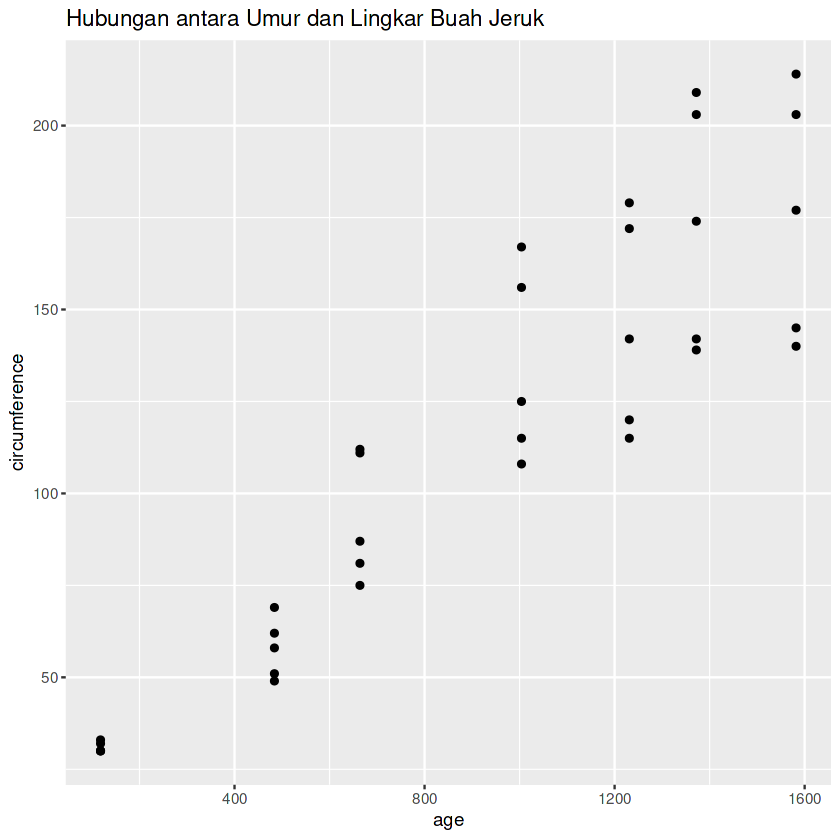

In [ ]:
# Membuat plot data
library(ggplot2)
# Memuat library ggplot2

ggplot(Orange, aes(x = age, y = circumference)) +
# ggplot() memulai pembuatan plot dengan menggunakan dataset Orange.
# aes(x = age, y = circumference) menetapkan bahwa
# sumbu x akan diisi dengan data dari kolom age (variabel umur)
# sumbu y akan diisi dengan data dari kolom circumference (lingkar buah jeruk).

 geom_point() +
# geom_point() menambahkan titik-titik ke plot sebagai representasi dari
# hubungan antara variabel age dan circumference.
# Setiap titik mewakili satu observasi dalam dataset Orange.

 labs(title = "Hubungan antara Umur dan Lingkar Buah Jeruk")
# menambahkan judul pada plot

In [ ]:
# Regresi Linier
linear_model <- lm(circumference ~ age, data = Orange)
# lm() digunakan untuk membuat model regresi linier.
# circumference ~ age adalah formula yang menunjukkan bahwa kita ingin memprediksi variabel circumference (lingkar buah) berdasarkan variabel age (umur).
# data = Orange menunjukkan bahwa data yang digunakan untuk analisis adalah dataset Orange.
# Hasil fungsi lm() disimpan dalam variabel linear_model.

summary(linear_model)
# summary() digunakan untuk mendapatkan ringkasan statistik dari model regresi linier yang disimpan dalam variabel linear_model.


Call:
lm(formula = circumference ~ age, data = Orange)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.310 -14.946  -0.076  19.697  45.111 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.399650   8.622660   2.018   0.0518 .  
age          0.106770   0.008277  12.900 1.93e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.74 on 33 degrees of freedom
Multiple R-squared:  0.8345,	Adjusted R-squared:  0.8295 
F-statistic: 166.4 on 1 and 33 DF,  p-value: 1.931e-14


In [ ]:
# Regresi Non-Linier (Quadratic)
nonlinear_model <- nls(circumference ~ a * age^2 + b * age + c, data = Orange,
                       start = list(a = 1, b = 1, c = 1))
# nls() digunakan untuk membuat model regresi non-linier.
# circumference ~ a * age^2 + b * age + c adalah formula yang menunjukkan
# prediksi variabel circumference (lingkar buah) berdasarkan model kuadratik dari variabel age (umur).
# data = Orange menunjukkan bahwa data yang digunakan untuk analisis adalah dataset Orange.
# start = list(a = 1, b = 1, c = 1) memberikan nilai awal untuk parameter a,b, dan c dalam model.

summary(nonlinear_model)
# summary() digunakan untuk mendapatkan ringkasan statistik dari model regresi non-linier yang disimpan dalam variabel nonlinear_model.


Formula: circumference ~ a * age^2 + b * age + c

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a -1.434e-05  2.004e-05  -0.716 0.479361    
b  1.314e-01  3.536e-02   3.715 0.000774 ***
c  1.029e+01  1.320e+01   0.779 0.441472    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.92 on 32 degrees of freedom

Number of iterations to convergence: 1 
Achieved convergence tolerance: 3.873e-08


`geom_smooth()` using formula = 'y ~ x'


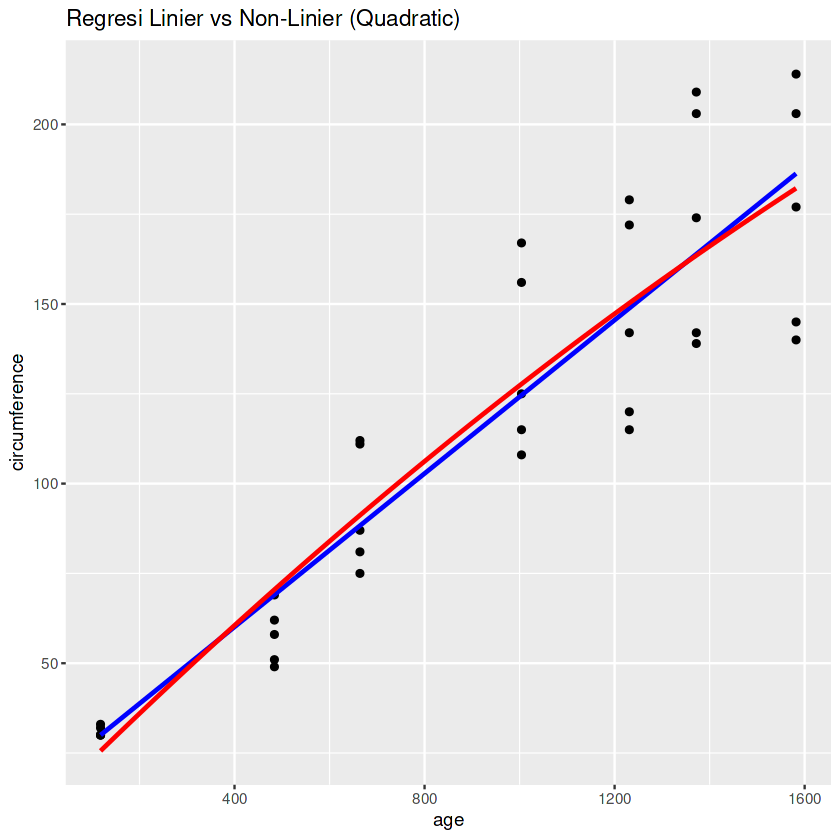

In [ ]:
# Menampilkan plot dengan hasil regresi
ggplot(Orange, aes(x = age, y = circumference)) +
# pembuatan plot dengan menggunakan dataset Orange.
# Sumbu x diisi dengan data dari kolom age,
# dan sumbu y diisi dengan data dari kolom circumference.

 geom_point() +
# menambahkan titik-titik ke plot sebagai representasi dari hubungan antara variabel age dan circumference

 geom_smooth(method = "lm", se = FALSE, color = "blue") +
# menambahkan garis regresi linier ke plot dengan warna biru menggunakan fungsi geom_smooth()
# dengan metode "lm" (regresi linier).
# se = FALSE menghilangkan area interval kepercayaan dari garis regresi.

 geom_smooth(method = "nls", formula = y ~ a * x^2 + b * x + c, se = FALSE, color = "red",
# menambahkan kurva regresi non-linier (quadratic) ke plot dengan warna merah menggunakan fungsi geom_smooth()
# dengan metode "nls" (Non-Linear Least Squares).
# formula = y ~ a * x^2 + b * x + c mendefinisikan formula regresi non-linier (quadratic).
# se = FALSE menghilangkan area interval kepercayaan dari kurva regresi.

 method.args = list(start = c(a = 1, b = 1, c = 1))) +
# method.args = list(start = c(a = 1, b = 1, c = 1)) memberikan nilai awal untuk parameter
# a, b, dan c dalam model.

 labs(title = "Regresi Linier vs Non-Linier (Quadratic)")
# menambahkan judul pada plot

## Contoh 4 (Regresi Non Linier Logaritmik)

Dalam contoh ini, kami menggunakan satu set data yang memiliki hubungan logaritmik. Kemudian, kami
membandingkan hasil regresi logaritmik dan linier untuk data tersebut dalam satu grafik. Anda dapat melihat
kedua garis regresi dan bagaimana mereka memodelkan hubungan yang berbeda dengan data logaritmik
tersebut. Perhatikan bahwa regresi logaritmik lebih cocok untuk data dengan hubungan logaritmik.

In [ ]:
# Membuat data contoh
set.seed(123)
x <- seq(1, 10, length.out = 100)
y_log <- 2 * log(2 * x) + rnorm(100, mean = 0, sd = 0.5) # Hubungan logaritmik dengan noise

# Membuat data frame
data_log <- data.frame(x, y_log)

# Regresi Logaritmik
logarithmic_model <- lm(y_log ~ log(x), data = data_log)
summary(logarithmic_model)


Call:
lm(formula = y_log ~ log(x), data = data_log)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21672 -0.28587 -0.01378  0.30961  1.03790 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.37358    0.12767   10.76   <2e-16 ***
log(x)       2.03726    0.07667   26.57   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4582 on 98 degrees of freedom
Multiple R-squared:  0.8781,	Adjusted R-squared:  0.8769 
F-statistic: 706.1 on 1 and 98 DF,  p-value: < 2.2e-16


In [ ]:
# Regresi Linier
linear_model <- lm(y_log ~ x, data = data_log)
summary(linear_model)


Call:
lm(formula = y_log ~ x, data = data_log)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.40045 -0.33512  0.04223  0.29488  1.37991 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.05460    0.12450   16.50   <2e-16 ***
x            0.45190    0.02043   22.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5361 on 98 degrees of freedom
Multiple R-squared:  0.8331,	Adjusted R-squared:  0.8314 
F-statistic: 489.3 on 1 and 98 DF,  p-value: < 2.2e-16


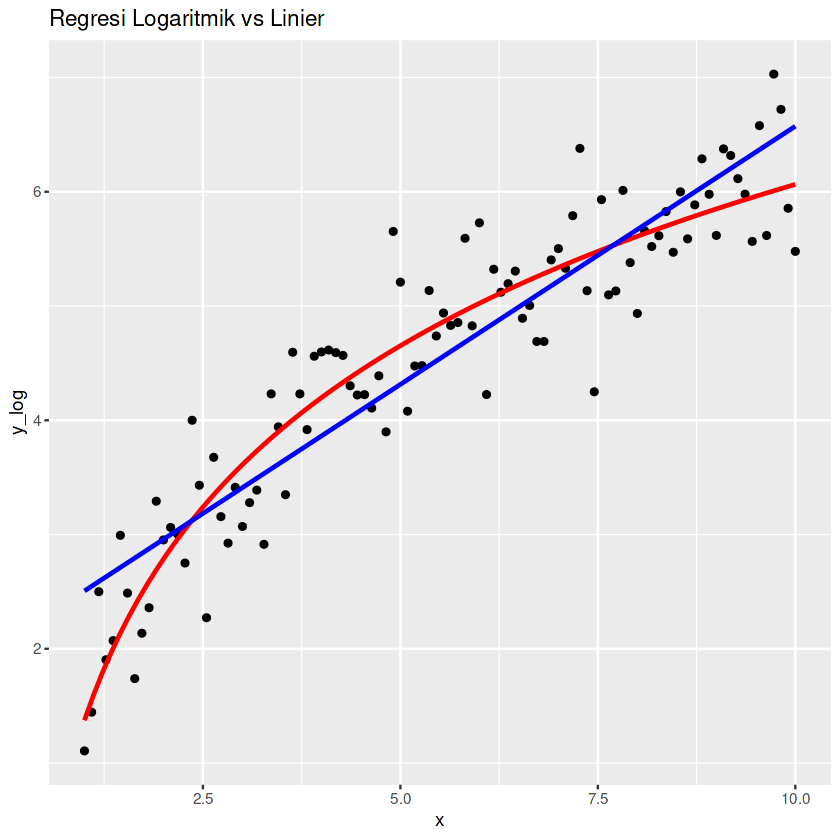

In [ ]:
# Menampilkan plot dengan hasil regresi
library(ggplot2)
ggplot(data_log, aes(x = x, y = y_log)) +
 geom_point() +
 geom_smooth(method = "lm", formula = y ~ log(x), se = FALSE, color = "red") +
 geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "blue") +
 labs(title = "Regresi Logaritmik vs Linier")